<a href="https://colab.research.google.com/github/blazingbhavneek/binary_image_classifier/blob/main/Using_bhavneek_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using my Image classifier model
## importing libraries

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Loading my model from google drive

In [3]:
loaded_model = tf.keras.models.load_model("/content/drive/My Drive/bhavneek_model_1.h5")

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


### Getting classnames from training notebook

In [29]:
class_names = ['conditioning exercise', 'sports']

## Getting a random image from google

In [37]:
!wget https://www.healthkart.com/connect/wp-content/uploads/2021/02/Banner-36.jpg #searched for gym
!wget https://static01.nyt.com/images/2022/12/28/multimedia/27ALTnba-nets-pro1-print-kd-1-c1a6/27nba-nets-pro-kd-1-c1a6-mediumSquareAt3X.jpg #searched for basketball

--2023-03-04 05:45:39--  https://www.healthkart.com/connect/wp-content/uploads/2021/02/Banner-36.jpg
Resolving www.healthkart.com (www.healthkart.com)... 104.18.15.13, 104.18.14.13, 2606:4700::6812:e0d, ...
Connecting to www.healthkart.com (www.healthkart.com)|104.18.15.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96022 (94K) [image/jpeg]
Saving to: ‘Banner-36.jpg.1’

Banner-36.jpg.1     100%[===================>]  93.77K  --.-KB/s    in 0.01s   

2023-03-04 05:45:41 (7.18 MB/s) - ‘Banner-36.jpg.1’ saved [96022/96022]

--2023-03-04 05:45:41--  https://static01.nyt.com/images/2022/12/28/multimedia/27ALTnba-nets-pro1-print-kd-1-c1a6/27nba-nets-pro-kd-1-c1a6-mediumSquareAt3X.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457960 (447K) [image/jpeg]
Saving to: ‘27nba

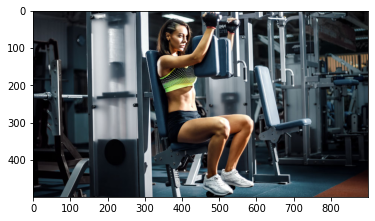

In [39]:
test1 = mpimg.imread("Banner-36.jpg")
test2 = mpimg.imread("27nba-nets-pro-kd-1-c1a6-mediumSquareAt3X.jpg")
plt.imshow(test1)

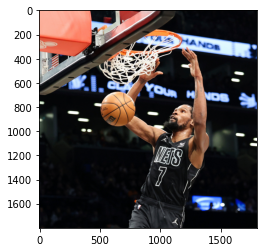

In [40]:
plt.imshow(test2)

In [41]:
print(test1.shape)
print(test2.shape)

(500, 900, 3)
(1800, 1800, 3)


#### Resisizing and normalizing

In [42]:
test1 = tf.image.resize(test1, size = [224, 224])
test2 = tf.image.resize(test2, size = [224, 224])
test1 = test1/255.
test2 = test2/255.
test1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.0968528 , 0.10077437, 0.12038221],
        [0.09653361, 0.10045518, 0.12006303],
        [0.0972192 , 0.10114077, 0.12074861],
        ...,
        [0.03100684, 0.03100684, 0.03884998],
        [0.05511211, 0.05511211, 0.06295525],
        [0.08903679, 0.08903679, 0.09687993]],

       [[0.10965168, 0.11357325, 0.13318108],
        [0.10353485, 0.10745642, 0.12706426],
        [0.09955388, 0.10347545, 0.12308329],
        ...,
        [0.02667077, 0.02667077, 0.0345139 ],
        [0.05119054, 0.05119054, 0.05903368],
        [0.08465187, 0.08465187, 0.09249501]],

       [[0.14796919, 0.15189075, 0.1714986 ],
        [0.12892157, 0.13284314, 0.15245098],
        [0.11708684, 0.1210084 , 0.14061625],
        ...,
        [0.02835696, 0.02835696, 0.0362001 ],
        [0.05150567, 0.05150567, 0.05934881],
        [0.08642925, 0.08642925, 0.09427238]],

       ...,

       [[0.04690408, 0.10180604, 0.13710016],
        [0.04

#### Lets see if the model is working

In [43]:
loaded_model.predict(test1)

InvalidArgumentError: ignored

#### Our model is throwing error because our input layer takes a 4-dim input, not a 3-dim, so we need to expand dimensions

In [44]:
test1 = tf.expand_dims(test1, axis=0)
test2 = tf.expand_dims(test2, axis=0)

In [45]:
res1 = int(tf.round(loaded_model.predict(test1)))
res2 = int(tf.round(loaded_model.predict(test2)))

1/1 [==============================] - 0s 87ms/step


In [46]:
print(class_names[res1])
print(class_names[res2])

conditioning exercise
sports


### As we can see, our model is working perfect-ly!!